<a href="https://colab.research.google.com/github/Hyrysake/My_Data_Science/blob/main/Hw10_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Частина 1

​

В якості домашнього завдання вам пропонується створити нейронну мережу за допомогою механізмів Keras, яка буде класифікувати товари із датасету fasion_mnist.



На відміну від попереднього завдання вам пропонується створити згорткову нейромережу. Підберіть архітектуру мережі та навчіть її на даних із датасету fasion_mnist. Спробуйте досягти максимально можливої точності класифікації за рахунок маніпуляції параметрами мережі. Порівняйте точність отриманої згорткової мережі з точністю багатошарової мережі з попереднього завдання. Зробіть висновки.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import plot_model
import keras
import numpy as np
from keras import layers
from keras import models
from keras import utils
import matplotlib.pyplot as plt
import time
import seaborn as sns

4422102/4422102 [==============================] - 0s 0us/step


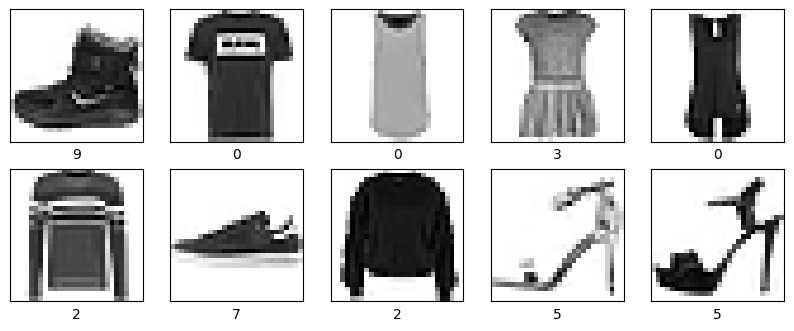

In [ ]:
mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [ ]:
unique_labels = np.unique(y_train)
print("Унікальні мітки в train_targets:", unique_labels)

Унікальні мітки в train_targets: [0 1 2 3 4 5 6 7 8 9]


In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

print("Нормалізовані значення train_images:", x_train.shape)
print("Нормалізовані значення test_images:", x_test.shape)
print("*"*50)
print("Мінімальне значення пікселів train_images:", x_train.min())
print("Максимальне значення пікселів train_images:", x_test.max())
print("*"*50)
print("Мінімальне значення пікселів test_images:", x_train.min())
print("Максимальне значення пікселів test_images:", x_test.max())

Нормалізовані значення train_images: (60000, 28, 28)
Нормалізовані значення test_images: (10000, 28, 28)
**************************************************
Мінімальне значення пікселів train_images: 0.0
Максимальне значення пікселів train_images: 1.0
**************************************************
Мінімальне значення пікселів test_images: 0.0
Максимальне значення пікселів test_images: 1.0


In [ ]:
x_train = x_train[:5000]
x_val = x_train[5000:]

y_train = y_train[:5000]
y_val = y_train[5000:]

Epoch 1/10
157/157 [==============================] - 12s 62ms/step - loss: 0.7896 - accuracy: 0.7160 - val_loss: 0.5388 - val_accuracy: 0.8001
Epoch 2/10
157/157 [==============================] - 10s 63ms/step - loss: 0.4791 - accuracy: 0.8298 - val_loss: 0.4990 - val_accuracy: 0.8171
Epoch 3/10
157/157 [==============================] - 7s 45ms/step - loss: 0.4048 - accuracy: 0.8554 - val_loss: 0.4497 - val_accuracy: 0.8343
Epoch 4/10
157/157 [==============================] - 11s 68ms/step - loss: 0.3534 - accuracy: 0.8774 - val_loss: 0.4171 - val_accuracy: 0.8509
Epoch 5/10
157/157 [==============================] - 9s 56ms/step - loss: 0.3230 - accuracy: 0.8850 - val_loss: 0.4271 - val_accuracy: 0.8462
Epoch 6/10
157/157 [==============================] - 7s 45ms/step - loss: 0.2826 - accuracy: 0.9012 - val_loss: 0.3945 - val_accuracy: 0.8606
Epoch 7/10
157/157 [==============================] - 8s 54ms/step - loss: 0.2610 - accuracy: 0.9062 - val_loss: 0.4045 - val_accuracy: 0.8

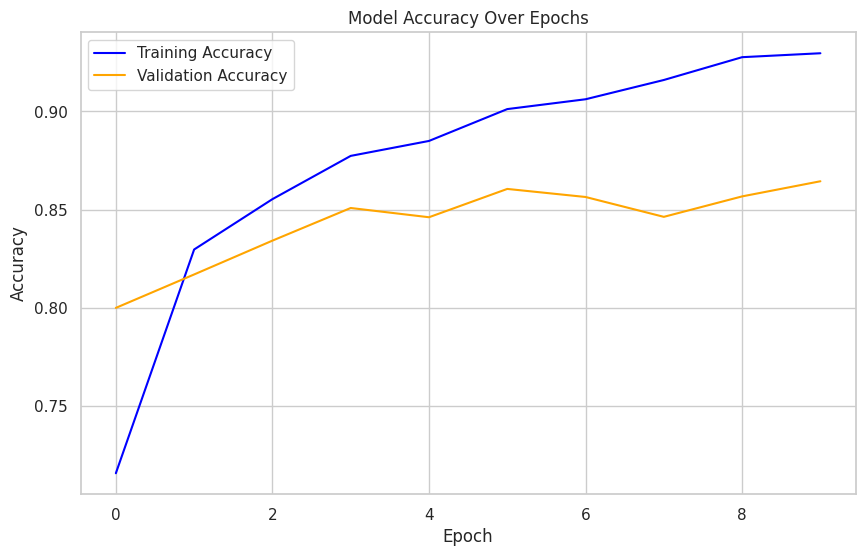

In [ ]:
time_start = time.time()

model = models.Sequential([
      layers.Conv2D(filters=64,
                    kernel_size=2,
                    padding='same',
                    activation='relu',
                    input_shape=(28,28,1)),
      layers.MaxPooling2D(pool_size=2),

      layers.Conv2D(filters=32,
                    kernel_size=2,
                    padding='same',
                    activation='relu'),
      layers.MaxPooling2D(pool_size=2),
      layers.Flatten(),
      layers.Dense(256, activation='relu'),
      layers.Dense(10, activation='softmax')
])

# Складаємо модель
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Візуалізація архітектури моделі
plot_model(model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)

# Тренуємо модель
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
time_end = time.time()

print(f"This took {time_end-time_start} seconds to run.")

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.grid(True)
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Порівнюючи результати точності нашої найкращої можелі з попереднього заняття (93,41%), згорткова нейромережа з першого разу показала кращий результат 94,71%, що на 1,3% краще

Варіант ІІ

Epoch 1/10
157/157 [==============================] - 11s 58ms/step - loss: 0.7381 - accuracy: 0.7354 - val_loss: 0.5395 - val_accuracy: 0.7967
Epoch 2/10
157/157 [==============================] - 7s 42ms/step - loss: 0.4531 - accuracy: 0.8374 - val_loss: 0.4982 - val_accuracy: 0.8236
Epoch 3/10
157/157 [==============================] - 10s 66ms/step - loss: 0.3874 - accuracy: 0.8658 - val_loss: 0.4341 - val_accuracy: 0.8406
Epoch 4/10
157/157 [==============================] - 11s 69ms/step - loss: 0.3415 - accuracy: 0.8836 - val_loss: 0.3976 - val_accuracy: 0.8601
Epoch 5/10
157/157 [==============================] - 15s 96ms/step - loss: 0.2919 - accuracy: 0.8952 - val_loss: 0.4082 - val_accuracy: 0.8566
Epoch 6/10
157/157 [==============================] - 11s 70ms/step - loss: 0.2650 - accuracy: 0.9056 - val_loss: 0.4309 - val_accuracy: 0.8489
Epoch 7/10
157/157 [==============================] - 7s 47ms/step - loss: 0.2279 - accuracy: 0.9166 - val_loss: 0.4269 - val_accuracy: 0

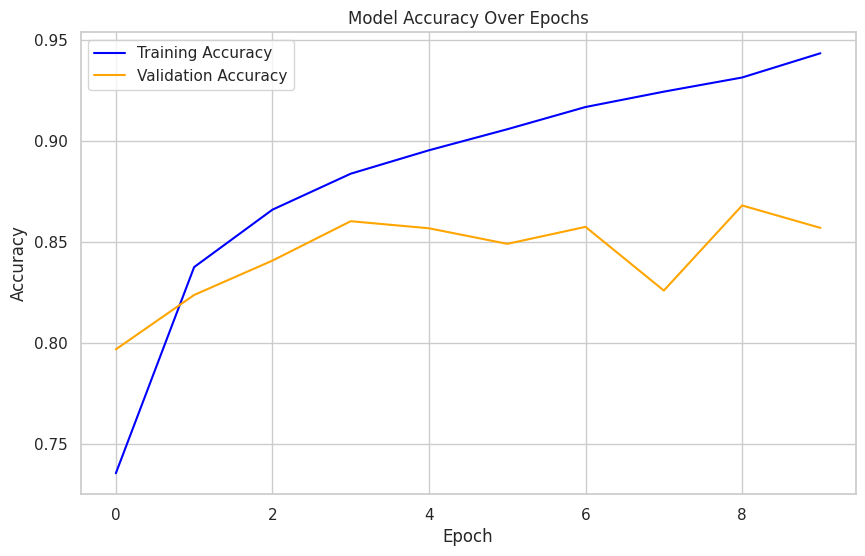

In [ ]:
time_start = time.time()

model = models.Sequential([
      layers.Conv2D(filters=32,
                    kernel_size=2,
                    padding='same',
                    activation='relu',
                    input_shape=(28,28,1)),
      layers.MaxPooling2D(pool_size=2),

      layers.Conv2D(filters=64,
                    kernel_size=2,
                    padding='same',
                    activation='relu'),
      layers.MaxPooling2D(pool_size=2),
      layers.Flatten(),
      layers.Dense(256, activation='relu'),
      layers.Dense(10, activation='softmax')
])

# Складаємо модель
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Візуалізація архітектури моделі
plot_model(model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)

# Тренуємо модель
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
time_end = time.time()

print(f"This took {time_end-time_start} seconds to run.")

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.grid(True)
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Зміна кількості фільрів показала гарний результат, підвищила точність моделі. модель успішно поліпшується з кожною епохою, але, можливо, починає перенавчатися після деякої кількості епох.

Варіант ІІІ

Epoch 1/10
157/157 [==============================] - 11s 60ms/step - loss: 0.9294 - accuracy: 0.6660 - val_loss: 0.6675 - val_accuracy: 0.7581
Epoch 2/10
157/157 [==============================] - 10s 63ms/step - loss: 0.5527 - accuracy: 0.7970 - val_loss: 0.5351 - val_accuracy: 0.8015
Epoch 3/10
157/157 [==============================] - 9s 55ms/step - loss: 0.4465 - accuracy: 0.8416 - val_loss: 0.4904 - val_accuracy: 0.8284
Epoch 4/10
157/157 [==============================] - 11s 69ms/step - loss: 0.4007 - accuracy: 0.8564 - val_loss: 0.4723 - val_accuracy: 0.8287
Epoch 5/10
157/157 [==============================] - 11s 68ms/step - loss: 0.3511 - accuracy: 0.8736 - val_loss: 0.4597 - val_accuracy: 0.8346
Epoch 6/10
157/157 [==============================] - 7s 47ms/step - loss: 0.3222 - accuracy: 0.8828 - val_loss: 0.4432 - val_accuracy: 0.8436
Epoch 7/10
157/157 [==============================] - 9s 56ms/step - loss: 0.2907 - accuracy: 0.8932 - val_loss: 0.4097 - val_accuracy: 0.

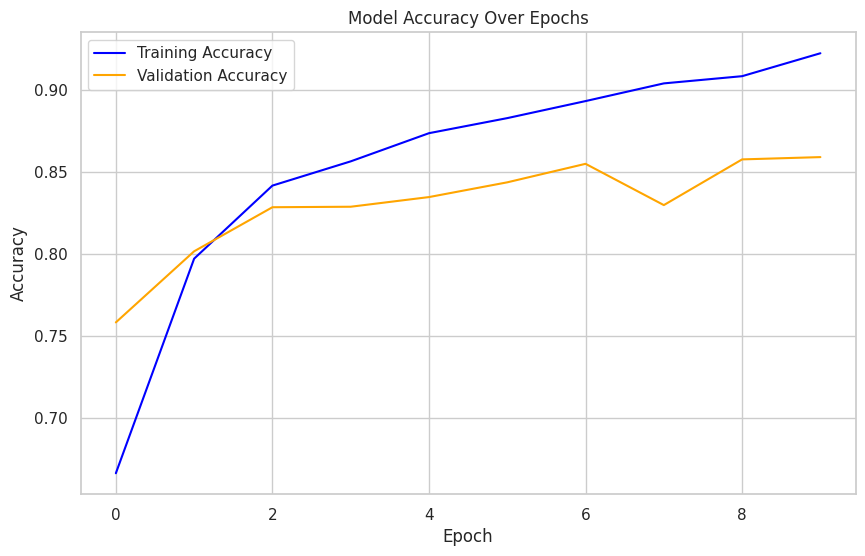

In [ ]:
time_start = time.time()

model = models.Sequential([
      layers.Conv2D(filters=32,
                    kernel_size=2,
                    padding='same',
                    activation='relu',
                    input_shape=(28,28,1)),
      layers.MaxPooling2D(pool_size=2),

      layers.Conv2D(filters=64,
                    kernel_size=2,
                    padding='same',
                    activation='relu'),
      layers.MaxPooling2D(pool_size=2),

      layers.Conv2D(filters=128,
                    kernel_size=2,
                    padding='same',
                    activation='relu'),
      layers.MaxPooling2D(pool_size=2),

      layers.Flatten(),
      layers.Dense(256, activation='relu'),
      layers.Dense(10, activation='softmax')
])

# Складаємо модель
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Візуалізація архітектури моделі
plot_model(model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)

# Тренуємо модель
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
time_end = time.time()

print(f"This took {time_end-time_start} seconds to run.")

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.grid(True)
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Точність моделі складає 93,07%, що є гарним результатом. Точність моделі на валідаційних даних також збільшується з кожною епохою, а функція втрат зменшується, висновок - модель добре узагальнює дані і не перенавчається.

Варіант ІV

Epoch 1/10
157/157 [==============================] - 9s 54ms/step - loss: 0.7095 - accuracy: 0.7498 - val_loss: 0.5072 - val_accuracy: 0.8092
Epoch 2/10
157/157 [==============================] - 9s 60ms/step - loss: 0.4379 - accuracy: 0.8486 - val_loss: 0.4976 - val_accuracy: 0.8133
Epoch 3/10
157/157 [==============================] - 7s 43ms/step - loss: 0.3815 - accuracy: 0.8666 - val_loss: 0.4245 - val_accuracy: 0.8467
Epoch 4/10
157/157 [==============================] - 8s 52ms/step - loss: 0.3127 - accuracy: 0.8906 - val_loss: 0.3885 - val_accuracy: 0.8638
Epoch 5/10
157/157 [==============================] - 7s 42ms/step - loss: 0.2716 - accuracy: 0.9064 - val_loss: 0.4471 - val_accuracy: 0.8467
Epoch 6/10
157/157 [==============================] - 8s 53ms/step - loss: 0.2435 - accuracy: 0.9130 - val_loss: 0.4580 - val_accuracy: 0.8417
Epoch 7/10
157/157 [==============================] - 7s 44ms/step - loss: 0.2120 - accuracy: 0.9276 - val_loss: 0.5021 - val_accuracy: 0.8268

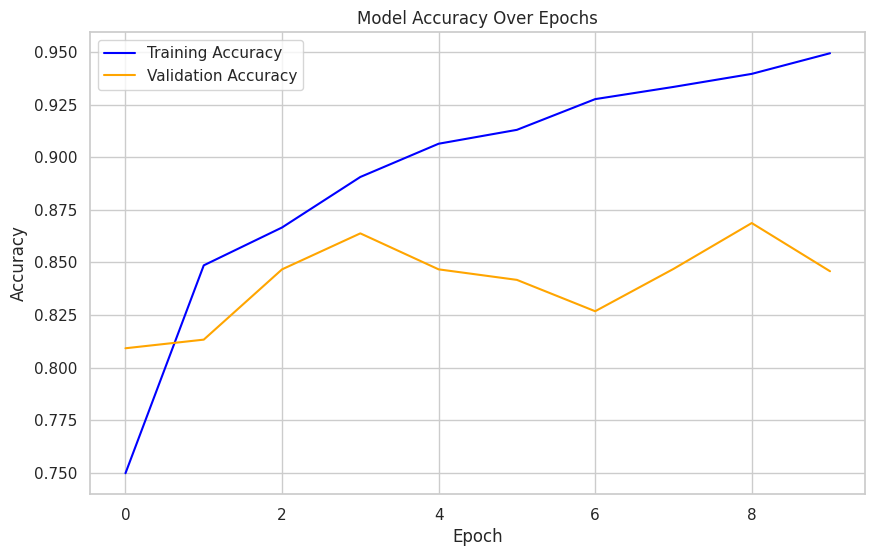

In [ ]:
time_start = time.time()

model = models.Sequential([
      layers.Conv2D(filters=32,
                    kernel_size=2,
                    padding='same',
                    activation='relu',
                    input_shape=(28,28,1)),
      layers.MaxPooling2D(pool_size=2),

      layers.Conv2D(filters=64,
                    kernel_size=2,
                    padding='same',
                    activation='relu'),
      layers.MaxPooling2D(pool_size=2),

      layers.Flatten(),
      layers.Dense(256, activation='elu'),
      layers.Dense(10, activation='softmax')
])

# Складаємо модель
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Візуалізація архітектури моделі
plot_model(model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)

# Тренуємо модель
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
time_end = time.time()

print(f"This took {time_end-time_start} seconds to run.")

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.grid(True)
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Точність моделі висока - 94,29% але функція втрат на валідаційних даних має тенденцію до коливань, це вказує на нестабільність у навчанні або наявність "шуму" в даних